# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [136]:
# * import sys
# Import the sys module, which is a Python standard library module.
# This module provides access to variables and functions that interact strongly with the
# Python interpreter, such as manipulating module search path and input/output
# standard, among others.
# * sys.path
# It is a list containing the paths in which the Python interpreter looks for modules when
# you use import. When you try to import a module, Python searches the paths specified in this
# list.
# * sys.path.insert(0, '..')
# Insert the path '..' (representing the parent directory) at the beginning of the sys.path list.
# Adding it in position 0 ensures that when Python looks for modules to import,
# first check in the parent directory before continuing with the default paths.

import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [137]:
# * from python_environment_check import check_packages
# Import the check_packages function from the python_environment_check module. 
# This module, from its name, appears to be designed to verify that the Python environment 
# have the correct versions of certain packages installed.
# * d = {...}
# Defines a dictionary d that contains the names of several packages as keys 
# (e.g. numpy, scipy, matplotlib, etc.) and as values ​​the minimum versions 
# required from those packages.
# * check_packages(d)
# The check_packages function takes as input the dictionary d and probably performs a 
# check on current Python environment to ensure installed versions 
# of these packages are at least those specified in the dictionary. If any of the packages 
# is not installed or has the wrong version, the function may throw an error or 
# suggest installing/updating the packages.

from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] numpy 1.21.2
[OK] matplotlib 3.4.3
[OK] sklearn 1.0.2
[OK] pandas 1.3.2


# Example 4 - Wine Dataset

### Overview

- [Importing libraries for data analysis and scaling](#importing-libraries-for-data-analysis-and-scaling)
- [Extracting the principal components step by step](#extracting-the-principal-components-step-by-step)
- [Total and explained variance](#total-and-explained-variance)
- [Feature transformation](#feature-transformation)
- [Principal component analysis in scikit-learn](#principal-component-analysis-in-scikit-learn)
- [Assessing feature contributions](#assessing-feature-contributions)
- [Summary](#summary)

In [138]:
# * from IPython.display
# Import from the display submodule of the IPython package. This module is designed to display 
# and render different types of data within interactive environments, such as Jupyter Notebooks.
# * import Image
# Import the Image class from the display module. The Image class is used to display 
# images in the interactive environment (for example, in a Jupyter Notebook cell).
# * %matplotlib inline
# This is a magic command specific to IPython/Jupyter Notebook.
# Enables display of matplotlib plots directly within cells of the 
# notebook. Graphics are rendered "inline" (within the same notebook) without the need 
# to open pop-up windows.

from IPython.display import Image
%matplotlib inline

## Importing libraries for data analysis and scaling

In [139]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

## Extracting the principal components step by step

In [140]:
# Download the wine dataset from the UCI Machine Learning Repository
df_wine = pd.read_csv('dataset1.csv')

In [141]:
# Show the first five rows of the dataset
df_wine.head()

,Col7,Col5,Col2,Col4,Col8,Col3,Col6,Col1,Target
0,20.8,0.733,48,9,22,120,72,56,0
1,32.0,0.444,42,1,29,100,66,196,0
2,34.8,0.217,24,1,45,112,80,132,0
3,31.0,0.874,21,0,16,113,80,0,0
4,26.2,0.313,41,6,30,80,66,0,0


In [142]:
# Show the shape of the dataset
df_wine.shape

(768, 9)

In [143]:
# Splitting the dataset into features and target variable
X, y = df_wine.iloc[:, 0:-1].values, df_wine.iloc[:, -1].values # Target variable is the first column

In [144]:
# Splitting the dataset into training and test sets
# stratify=y makes sure that the training and test datasets have the same class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0) # 30% test data

In [145]:
# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [146]:
# Calculate the covariance matrix
cov_mat = np.cov(X_train_std.T)

In [147]:
# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [148]:
print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [2.06198616 1.78419785 0.38116864 0.4175863  1.0525099  0.66961567
 0.78584146 0.86201938]


In [149]:
print('\nEigenvectors \n', eigen_vecs)


Eigenvectors 
 [[-0.46561259 -0.01585075 -0.23366668 -0.1225715  -0.35507271 -0.75978144
   0.08486651 -0.05275401]
 [-0.24869163 -0.12211037  0.05220121 -0.10588605  0.56318963 -0.03702125
   0.16132485 -0.75148245]
 [-0.15682076  0.62626761 -0.44083422  0.59634259  0.09496122  0.07764902
  -0.07365096 -0.1129839 ]
 [-0.09429246  0.57328254  0.31103649 -0.47956366  0.03620621 -0.04873603
  -0.5724271  -0.0661225 ]
 [-0.45175304 -0.32722874  0.43019929  0.48705225 -0.21375142  0.13019185
  -0.44094767 -0.09733848]
 [-0.38350416  0.22088541  0.44013895  0.08900086  0.3996422  -0.0937233
   0.42399656  0.50420205]
 [-0.36151365  0.19248786  0.02564004 -0.25282569 -0.50523979  0.54676686
   0.42143175 -0.18934651]
 [-0.45389999 -0.26655812 -0.52167544 -0.28124136  0.29281647  0.29710105
  -0.28611549  0.34030429]]


## Total and explained variance

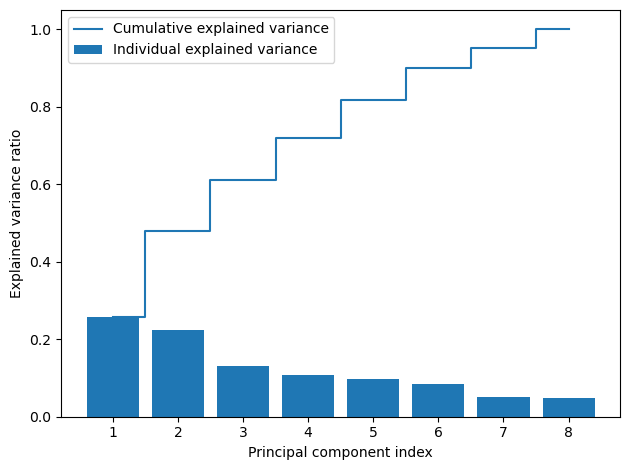

In [150]:
# Calculate the explained variance ratio
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,9), var_exp, align='center', label='Individual explained variance')
plt.step(range(1,9), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Feature transformation

In [151]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [152]:
# Construct the projection matrix 
# In this case, we will reduce the high-dimensional feature space to a 2-dimensional feature subspace
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.46561259 -0.01585075]
 [-0.24869163 -0.12211037]
 [-0.15682076  0.62626761]
 [-0.09429246  0.57328254]
 [-0.45175304 -0.32722874]
 [-0.38350416  0.22088541]
 [-0.36151365  0.19248786]
 [-0.45389999 -0.26655812]]


In [153]:
# Transform the first element of the training dataset using the projection matrix
X_train_std[0].dot(w)

array([ 2.01448669, -0.97332067])

In [154]:
# Transform the entire training dataset using the projection matrix
X_train_pca = X_train_std.dot(w)

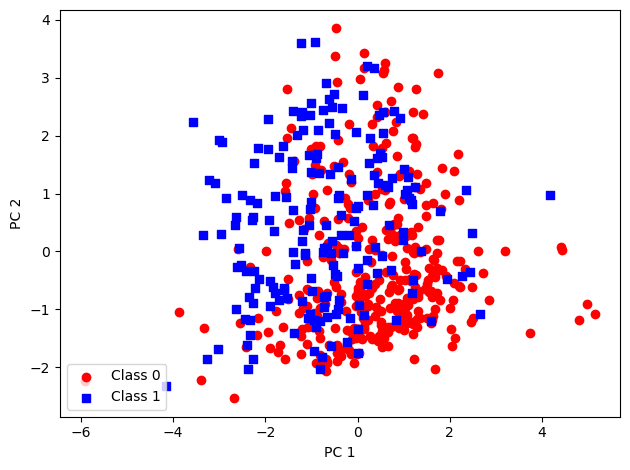

In [155]:
# Visualize the transformed  training dataset in a two-dimensional scatterplot
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Principal component analysis in scikit-learn

In [156]:
# Auxiliar function to plot the decision regions
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

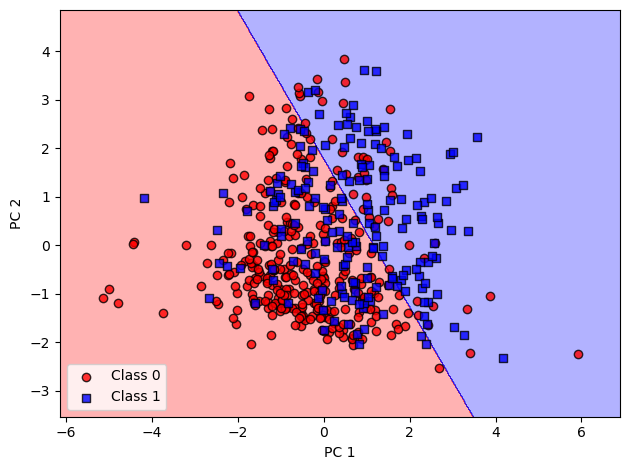

In [157]:
# scikit-learn
# Initializing the PCA transformer
pca = PCA(n_components=2)

# Initializing the logistic regression estimator:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs') # ovr = One-vs-Rest, lbfgs = Limited-memory Broyden-Fletcher-Goldfarb-Shanno

# Dimensionality reduction
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)

# Plotting the decision regions in the reduced space for the training dataset
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

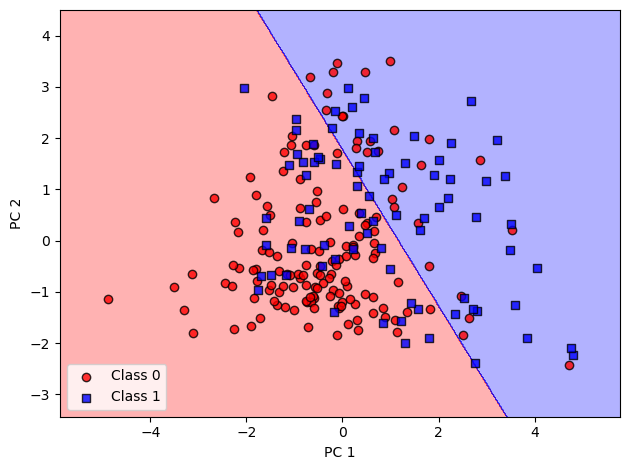

In [158]:
# scikit-learn
# Plotting the decision regions in the reduced space for the test dataset
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [159]:
# scikit-learn
# Explained variance ratios
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
print(pca.explained_variance_ratio_)

[0.25726829 0.22260942 0.13131874 0.10755177 0.09804726 0.08354609
 0.05210108 0.04755735]


## Assessing feature contributions

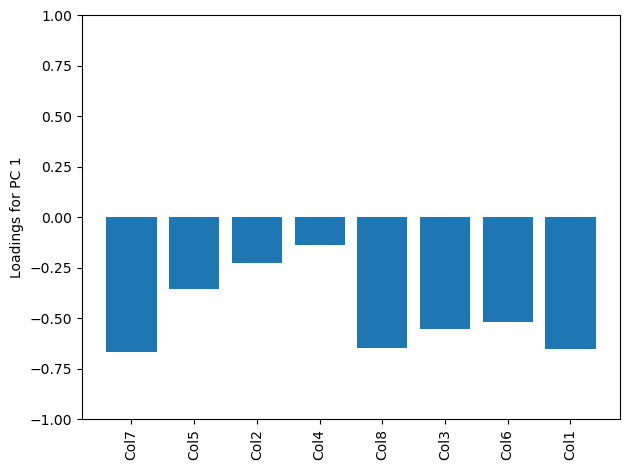

In [160]:
# Calculate the loadings
loadings = eigen_vecs * np.sqrt(eigen_vals)

# Plot the loadings for the first principal component
fig, ax = plt.subplots()
ax.bar(range(8), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(8))
ax.set_xticklabels(df_wine.columns[0:-1], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

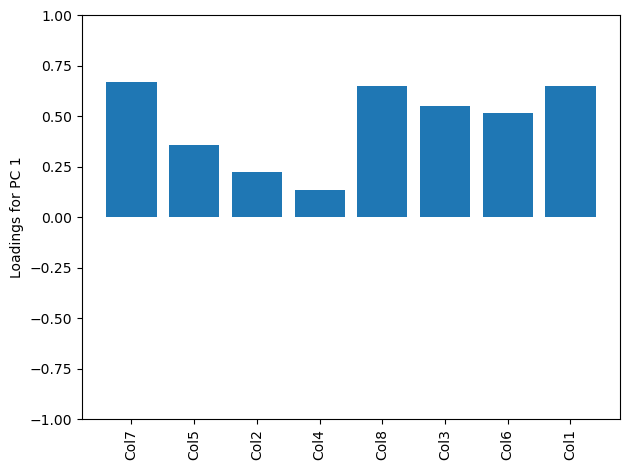

In [161]:
# scikit-learn
# Calculate the loadings
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Plot the loadings for the first principal component
fig, ax = plt.subplots()
ax.bar(range(8), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(8))
ax.set_xticklabels(df_wine.columns[0:-1], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

# Summary

---

Readers may ignore the next cell.

In [162]:
# Run a command in the terminal from a Python environment (such as a Jupyter Notebook or a 
# script that allows system commands to convert a Jupyter notebook to a file Python script. 
# * !
# This symbol is used in environments such as Jupyter Notebooks to execute system commands 
# operational directly from the notebook. In this case, the command is an execution of a 
# Python Script.
# * python ../.convert_notebook_to_script.py
# This command runs a Python script called convert_notebook_to_script.py. This file 
# is located in the previous directory (../ indicates that it is one level up in the system 
# files). The purpose of this script is to convert a Jupyter notebook (.ipynb) into a 
# Python script file (.py).
# * --input ex05.ipynb
# This is an option or argument that tells the script what the input file is, in this 
# case, the notebook ex05.ipynb.
# * --output ex05.py
# This option tells the script to save the output (the converted file) with the name
# ex05.py, which is a Python script.

! python ../.convert_notebook_to_script.py --input ex05.ipynb --output ex05.py

[NbConvertApp] Converting notebook ex05.ipynb to script
[NbConvertApp] Writing 11164 bytes to ex05.py
